In [ ]:
%config InlineBackend.figure_formats = ['svg']

import pathlib

import matplotlib.pyplot as plt # noqa
import numpy as np
import einbench

Generate a range of pairwise contractions with theoretical number of scalar 
operations varying up $\sim10^9$. 

- half are generate with guaranteed no batch dimensions (i.e. can map to matrix multiplication), half with possible batch dimensions.
- we don't generate contractions with summed or trace indices, as these can be trivially reduced before contraction.

In [ ]:


flopss = []
sizes = []

out_path = pathlib.Path("contractions_benchmark.txt")
out_path.parent.mkdir(parents=True, exist_ok=True)
i = 0

seen = set()

with out_path.open(mode="w", encoding="utf-8") as f:

    for C in np.arange(2.0, 30.01, 0.5):
        for seed in range(10):
            for allow_batch in [False, True]:

                inputs, output, size_dict = einbench.random_pairwise_contraction(
                    cost=2**C,
                    allow_batch=allow_batch,
                    allow_outer=True,
                    allow_scalar=True,
                    allow_sum=False,
                    allow_trace=False,
                    seed=seed
                )

                eq = (
                    f"{''.join(inputs[0])},"
                    f"{''.join(inputs[1])}->"
                    f"{''.join(output)}"
                )

                con = f"{eq}; size_dict={size_dict};"
                if con in seen:
                    continue
                seen.add(con)

                # eq = ctg.utils.inputs_output_to_eq(inputs, output)
                f.write(f"i={i}; {con}\n")

                flops, size = einbench.compute_flops_and_size(
                    inputs, output, size_dict
                )
                flopss.append(flops)
                sizes.append(size)
                i += 1

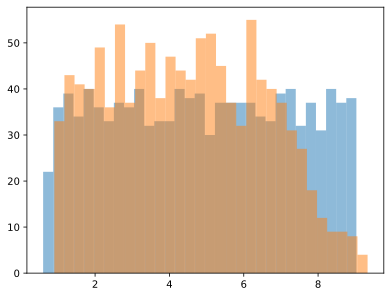

In [3]:
plt.hist(np.log10(flopss), bins=31, alpha=0.5);
plt.hist(np.log10(sizes), bins=31, alpha=0.5);

Generate cheaper pairwise contractions for verifying `einsum` implementations, 
these include sum and trace indices.

In [4]:
flopss = []
sizes = []

out_path = pathlib.Path("contractions_verify.txt")
out_path.parent.mkdir(parents=True, exist_ok=True)
i = 0

seen = set()

with out_path.open(mode="w", encoding="utf-8") as f:

    for C in np.arange(2.0, 16.01, 0.5):
        for seed in range(50):

            inputs, output, size_dict = einbench.random_pairwise_contraction(
                cost=2**C,
                allow_batch=True,
                allow_outer=True,
                allow_scalar=True,
                allow_sum=True,
                allow_trace=True,
                seed=seed
            )

            eq = (
                f"{''.join(inputs[0])},"
                f"{''.join(inputs[1])}->"
                f"{''.join(output)}"
            )

            con = f"{eq}; size_dict={size_dict};"
            if eq in seen:
                continue
            seen.add(eq)

            # eq = ctg.utils.inputs_output_to_eq(inputs, output)
            f.write(f"i={i}; {con}\n")

            flops, size = einbench.compute_flops_and_size(
                inputs, output, size_dict
            )
            flopss.append(flops)
            sizes.append(size)
            i += 1

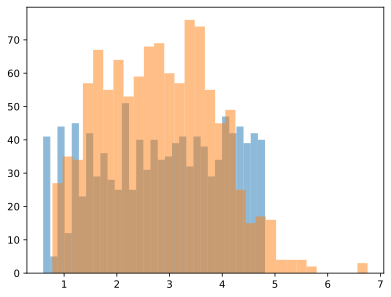

In [5]:
plt.hist(np.log10(flopss), bins=31, alpha=0.5);
plt.hist(np.log10(sizes), bins=31, alpha=0.5);